# Plot Model Weights

In [29]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (20, 20), 'figure.dpi': 300}
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Weights

In [44]:
from common.paths import PLS_WEIGHTS, RIDGE_WEIGHTS

pls_weights = np.load(PLS_WEIGHTS)
ridge_weights = np.load(RIDGE_WEIGHTS)

# selected_features = pls_weights
selected_features = ridge_weights

print(selected_features.shape, np.min(selected_features), np.max(selected_features))

(34716,) -0.025800949 0.026103048


## Plot Weights

In [38]:
from common.plotting import create_power_fc_matrix, plot_connections
from mne.viz import circular_layout, plot_connectivity_circle

### Nilearn

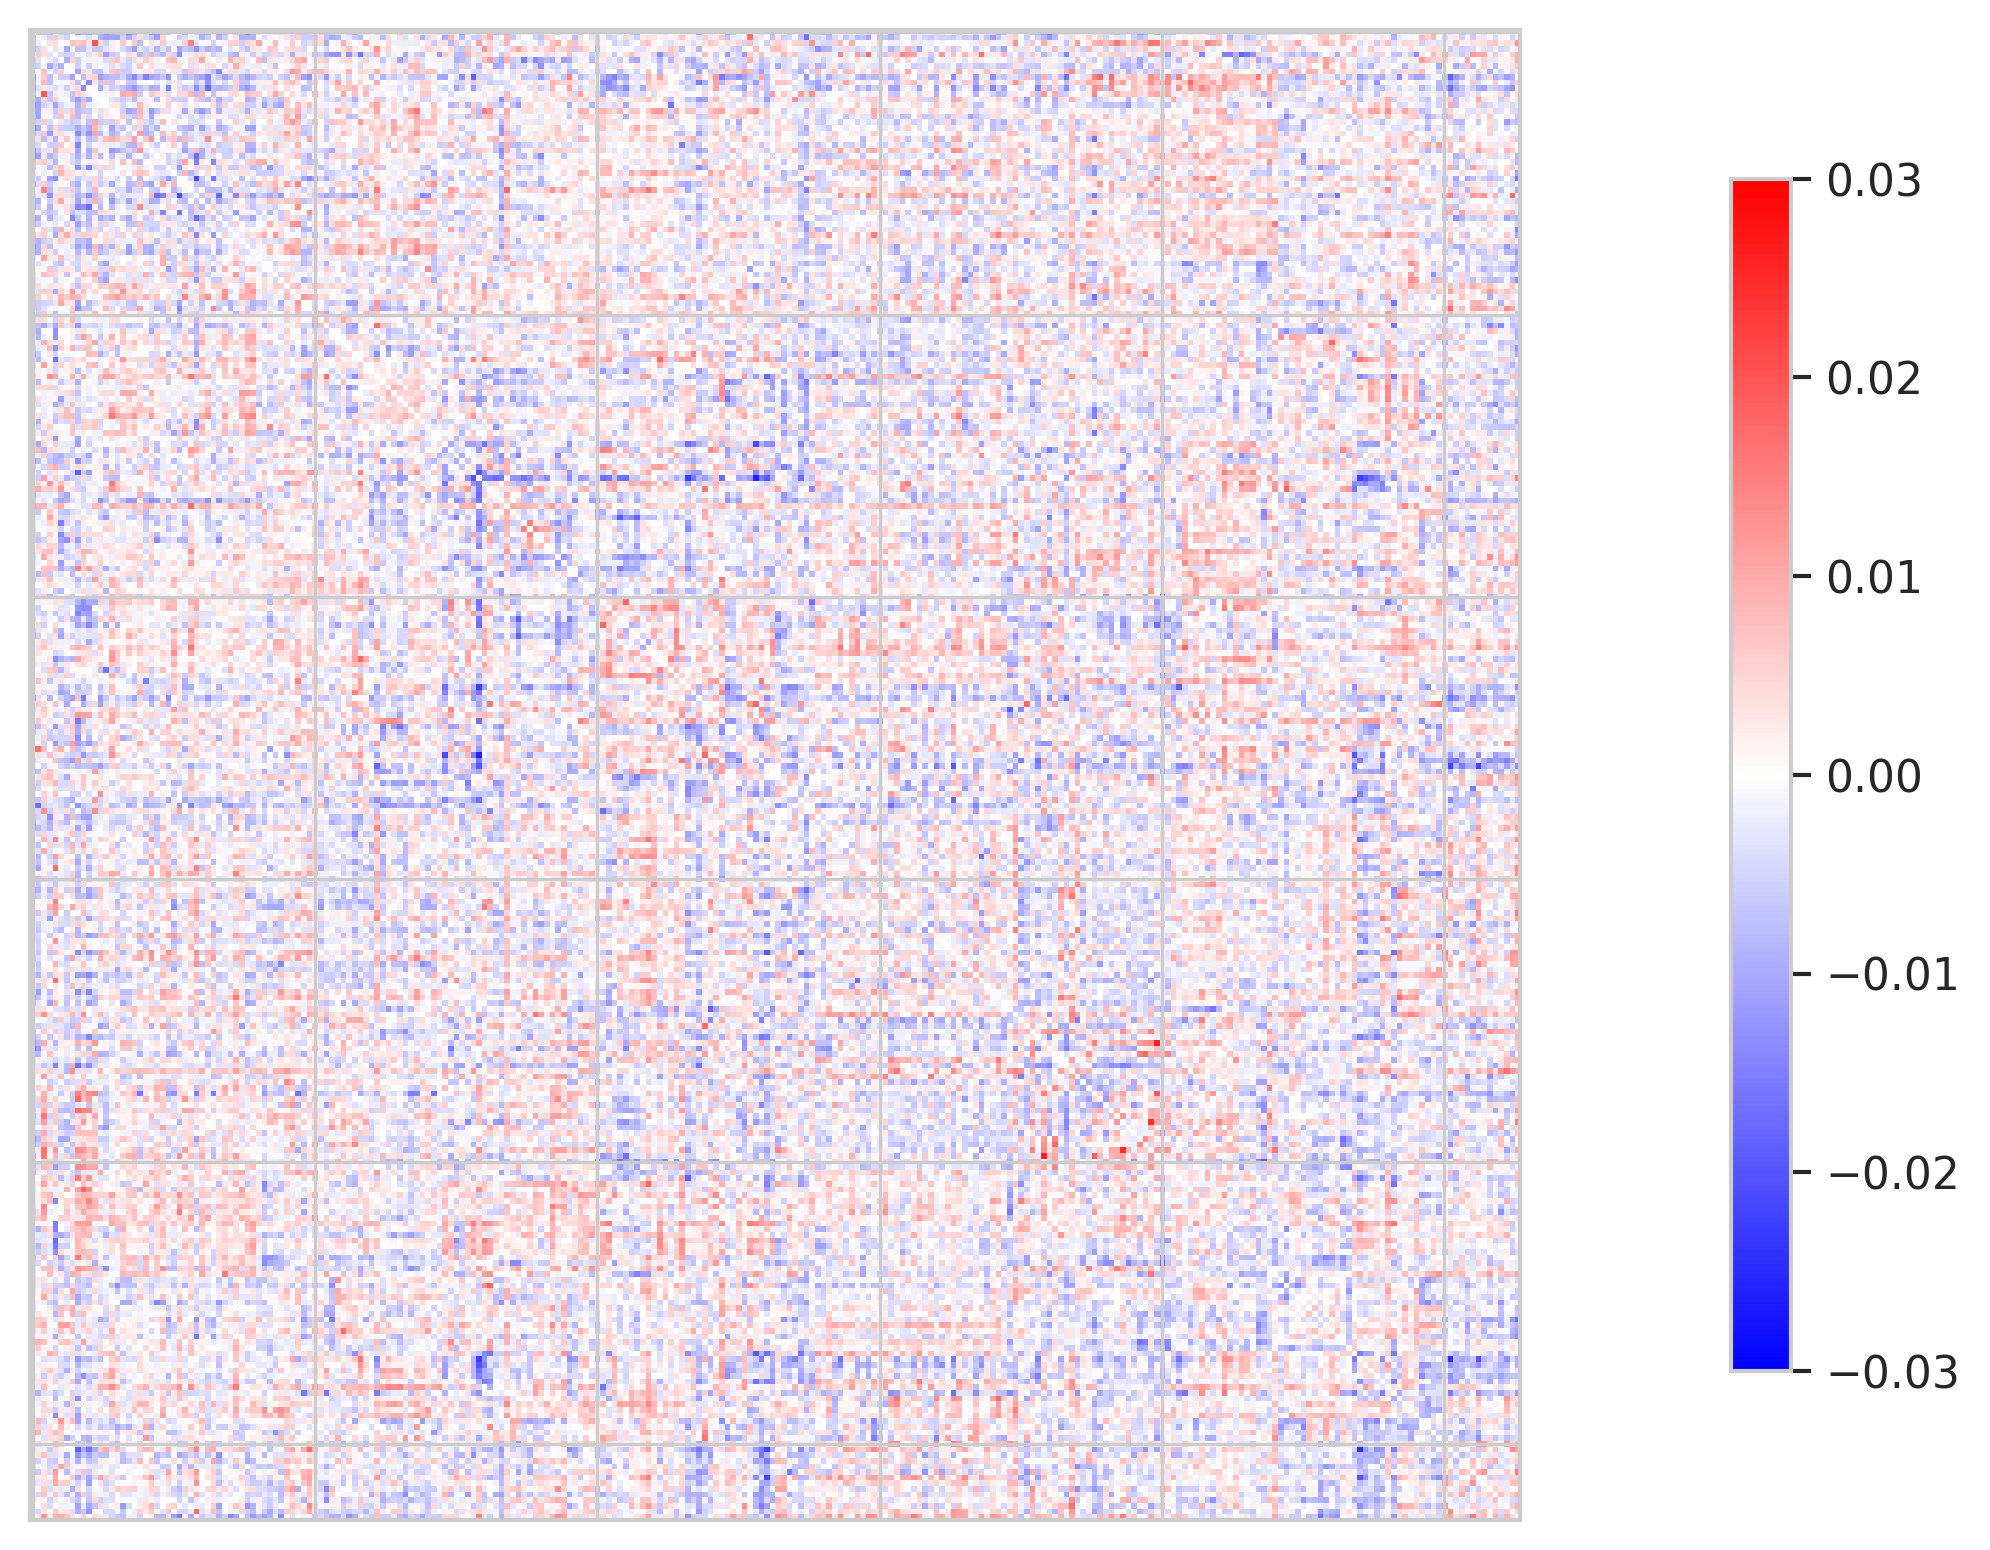

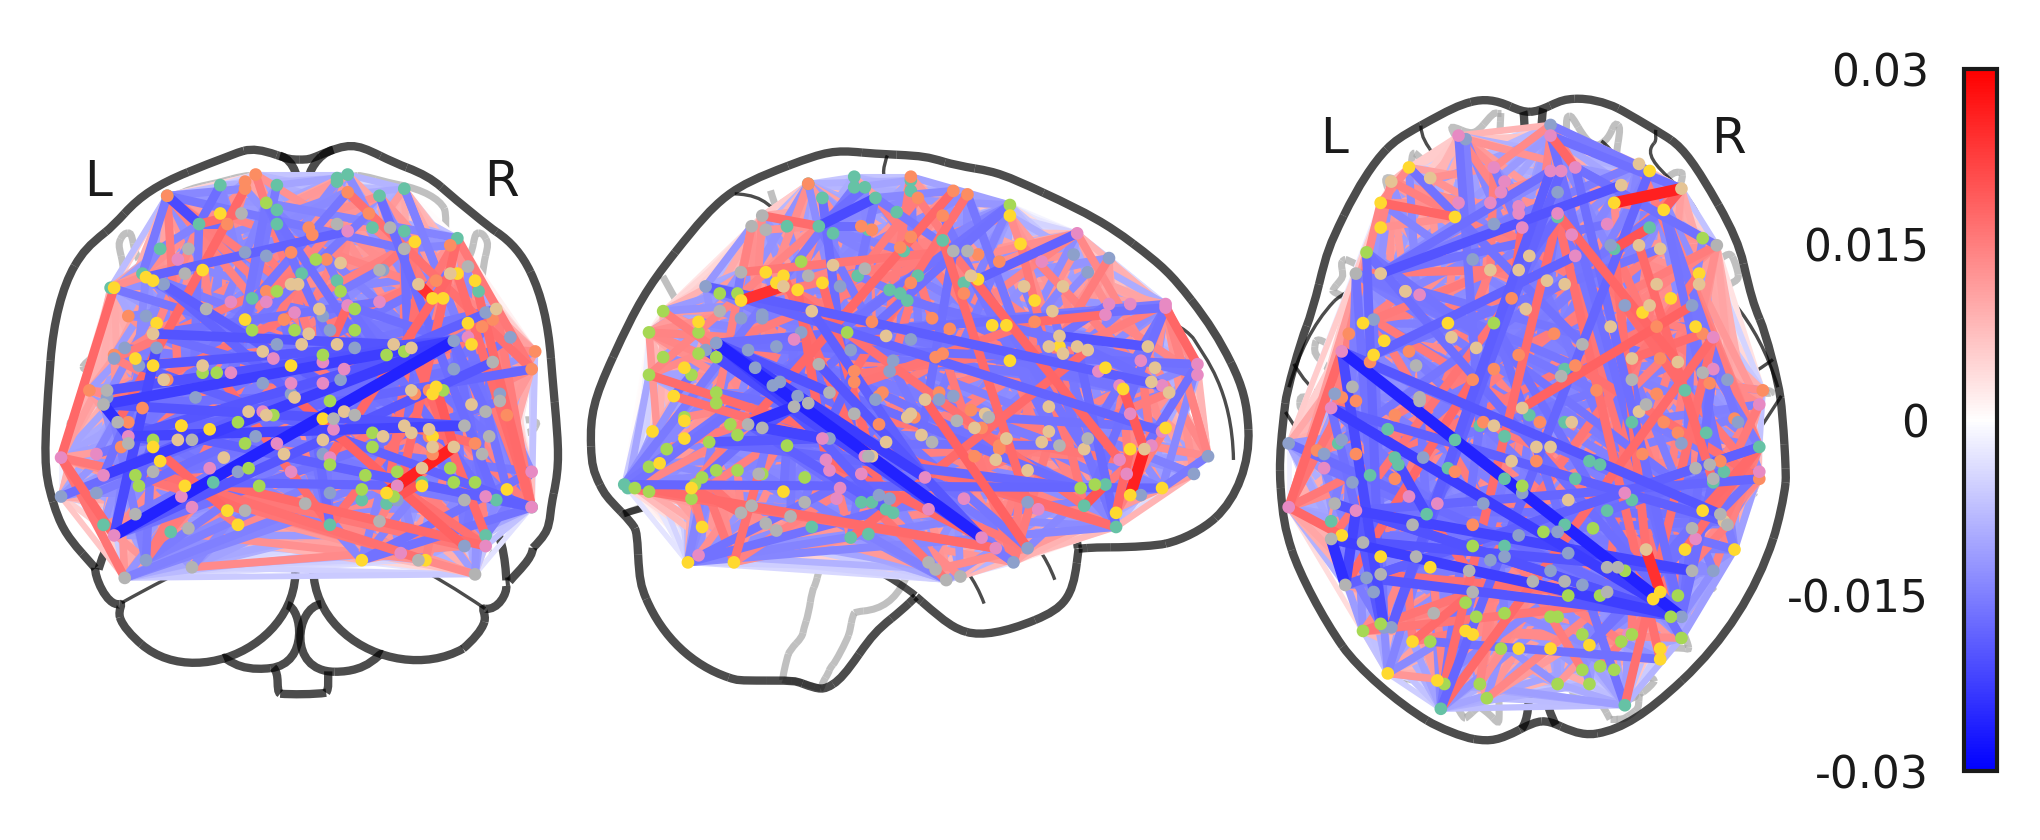

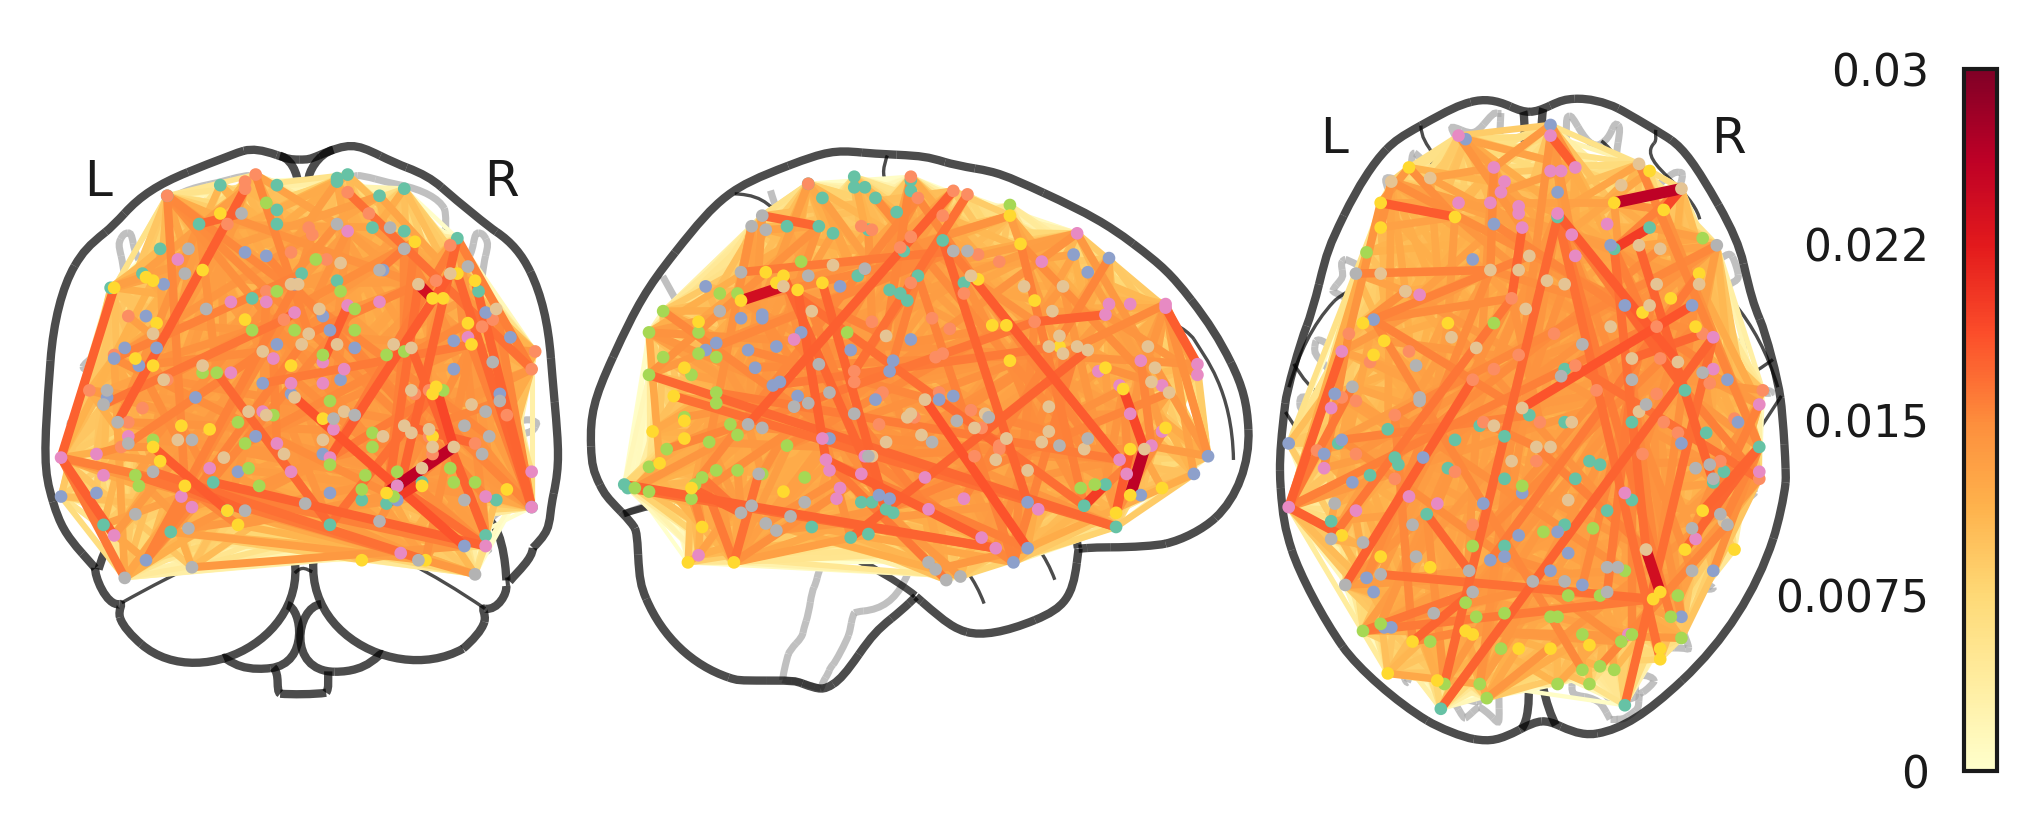

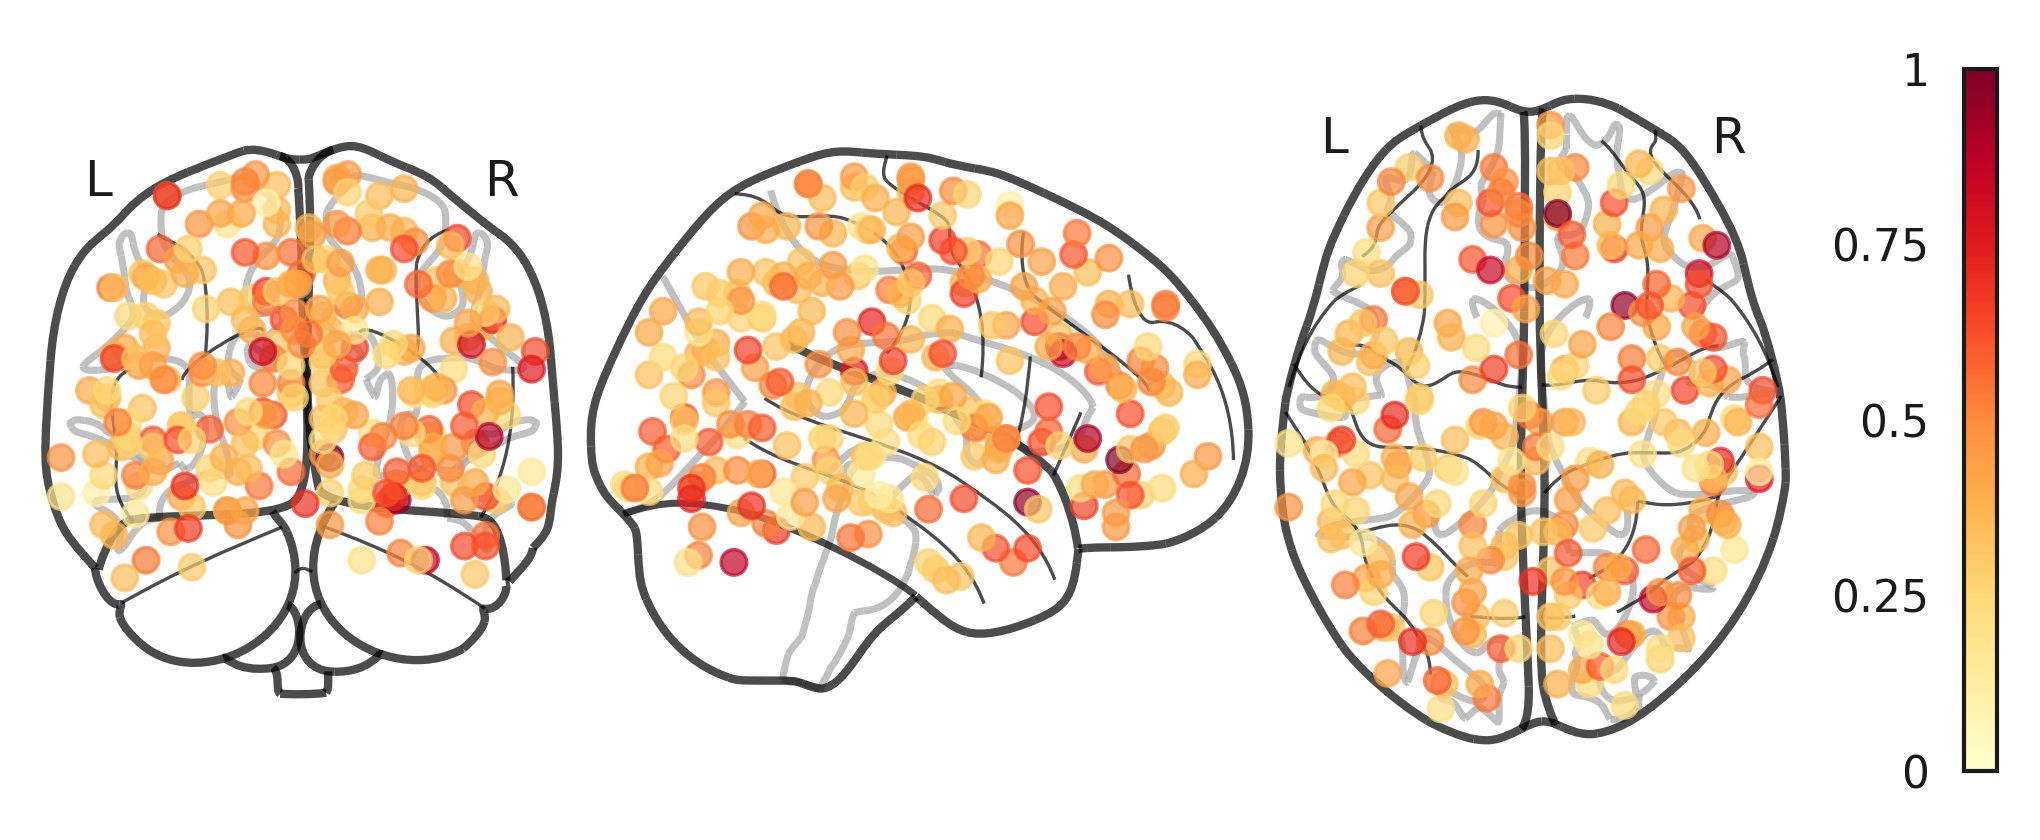

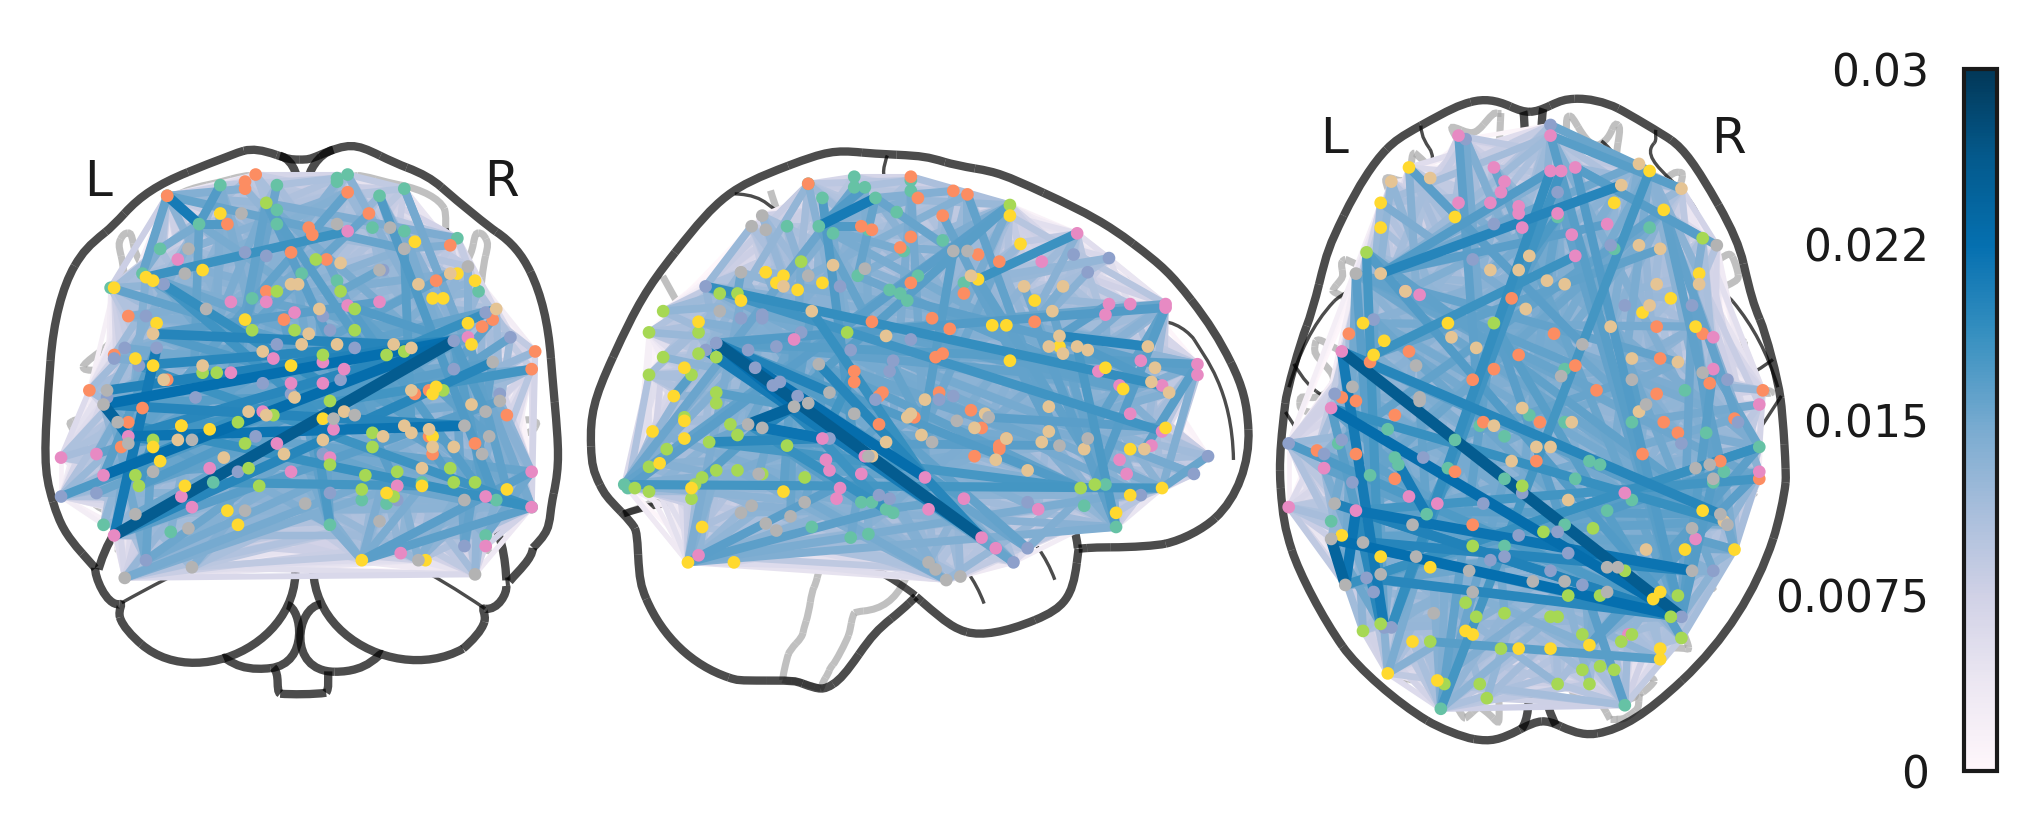

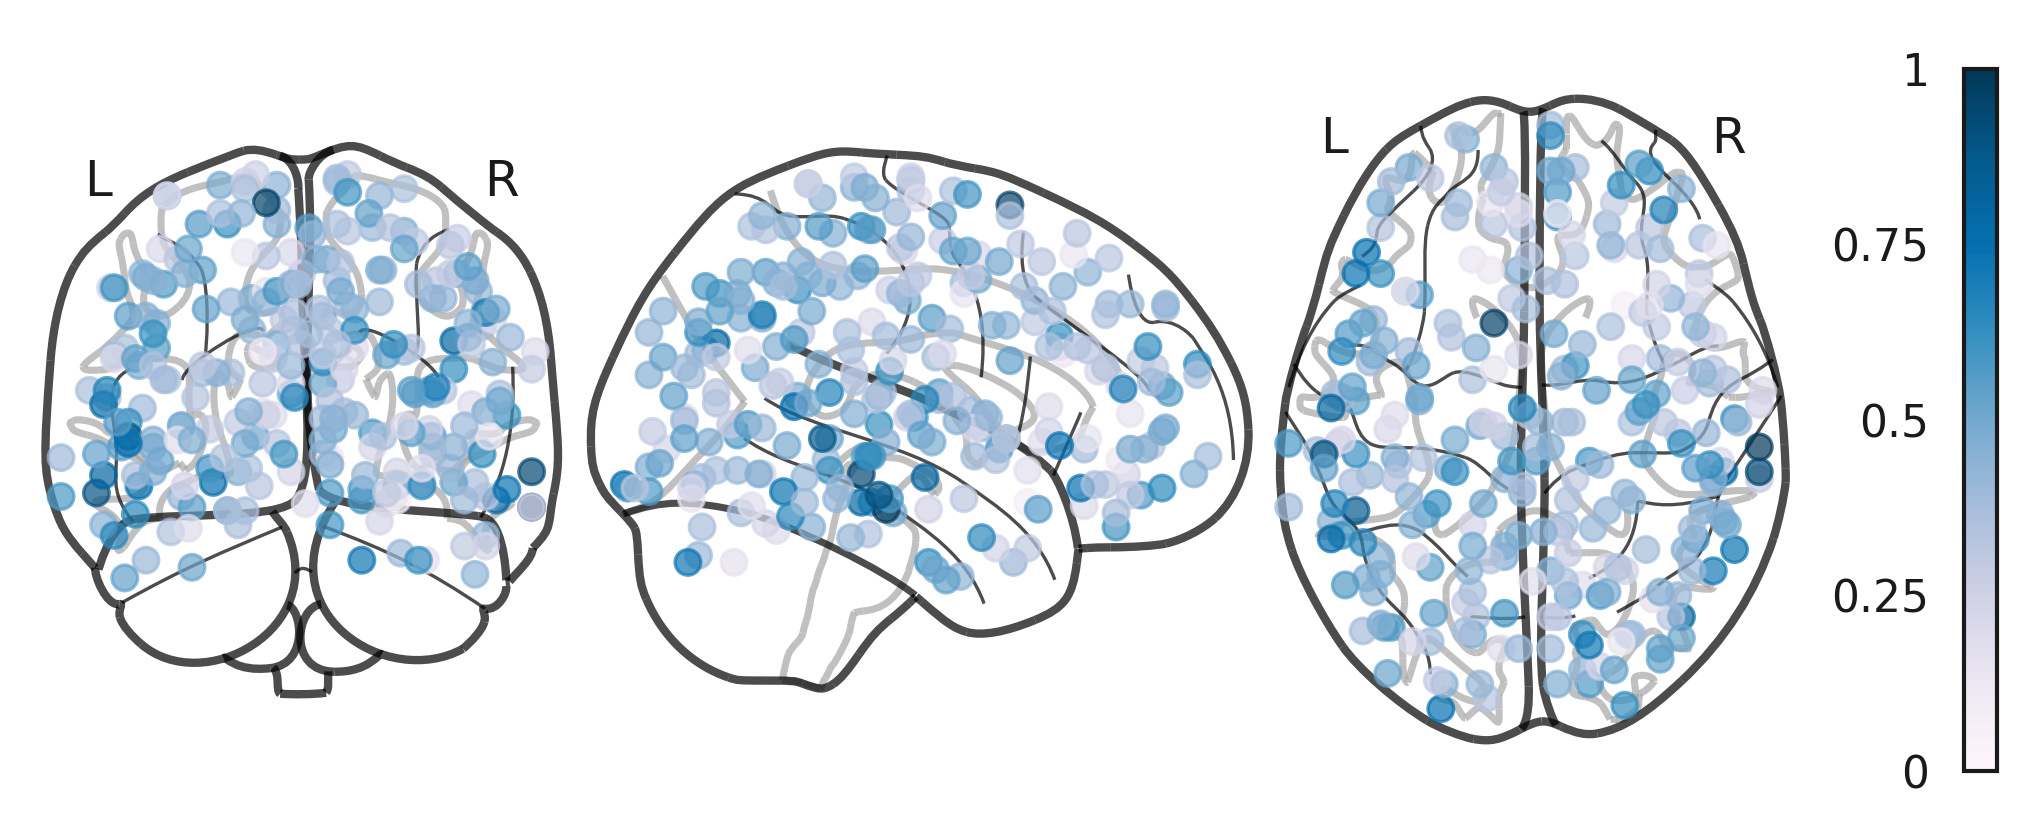

In [45]:
plot_connections(selected_features, -0.03, 0.03, False)

### MNE

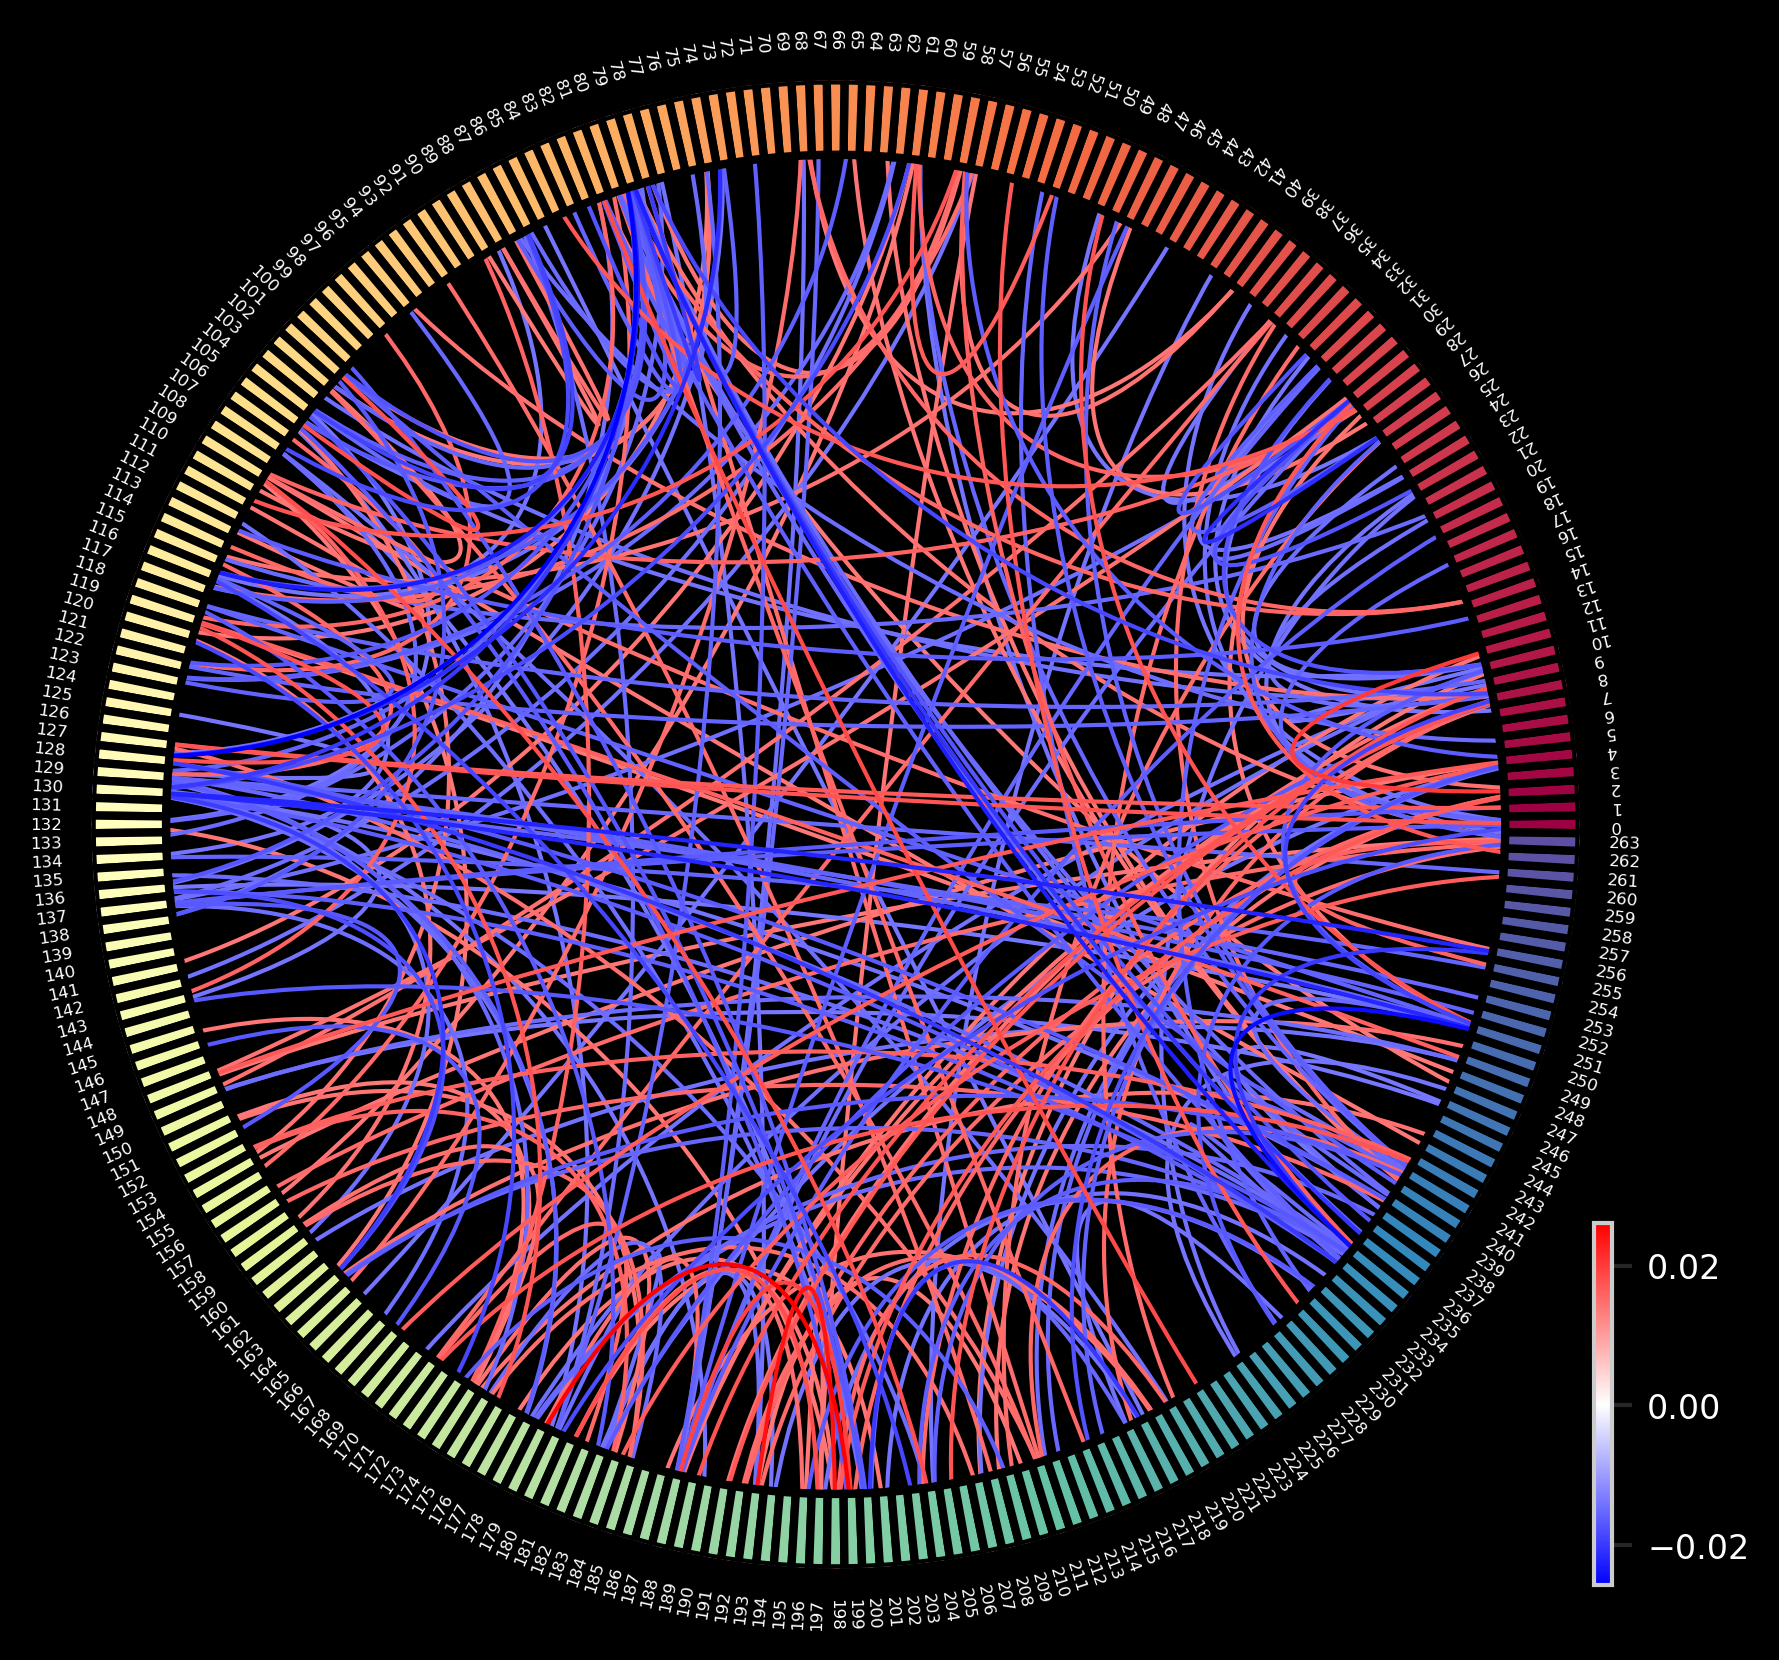

(<Figure size 2400x2400 with 2 Axes>, <PolarAxesSubplot:>)

In [36]:
matrix = create_power_fc_matrix(selected_features)
label_names = [f'{node_num}' for node_num in range(0, 264)]

plot_connectivity_circle(matrix, label_names, n_lines=300, fontsize_names=4, padding=0, 
                         colormap='bwr', linewidth=1, show=True)

## Analyze Nodes

In [ ]:
from nilearn import plotting, datasets
from common.calculation import get_k_argmax
from common.plotting import create_power_fc_matrix, convert_fc_to_node_strength

power = datasets.fetch_coords_power_2011()
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T
matrix = create_power_fc_matrix(pls_coef)

# clip connectivity matrix to preserve positive and negative edges
positive_edges = np.clip(matrix, 0, matrix.max())
negative_edges = np.clip(matrix, matrix.min(), 0)

# calculate strength for positive edges
node_strength_positive = convert_fc_to_node_strength(positive_edges)

# calculate strength for negative edges
node_strength_negative = convert_fc_to_node_strength(negative_edges)

print(node_strength_positive.shape, node_strength_negative.shape)
top_pos_nodes = get_k_argmax(node_strength_positive, 10)
top_neg_nodes = get_k_argmax(node_strength_negative, 10)

print(coords[top_pos_nodes], node_strength_positive[top_pos_nodes])
print(coords[top_neg_nodes], node_strength_negative[top_neg_nodes])

plotting.plot_markers(node_strength_positive[top_pos_nodes], coords[top_pos_nodes],
                      node_vmin=0, node_vmax=1, node_cmap="YlOrRd")
plotting.plot_markers(node_strength_negative[top_neg_nodes], coords[top_neg_nodes],
                      node_vmin=0, node_vmax=1, node_cmap="PuBu")